In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.version)
sys.path += ["../","../data"]
import numpy as np
from memfg.sampler import Sampler
from memfg.dsphdata import dSphData, dSphProp
import matplotlib.pyplot as plt
import pandas as pd

3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]


../memfg/modki17.py:8: UserWarning: python version is older than 3.7, so ordinary dict cannot keep the ordering.
Hereafter we use OrderedDict instead of dict.
  warnings.warn("python version is older than 3.7, so ordinary dict cannot keep the ordering.\nHereafter we use OrderedDict instead of dict.")


In [2]:
dsphdata = dSphData("sample_photo.csv","sample_spec.csv")
dsphprop = dSphProp("Ursa Minor",distance=76000,distance_err=6000)

radial velocity err loaded.
<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (227.28541667, 67.2225, 76000.)>
distance_err = 6000


In [3]:
dsphdata.sc_spec.radial_velocity

<Quantity [-246.9 , -241.1 , -234.6 , -252.5 , -246.5 , -247.9 , -244.3 ,
           -244.2 ,  -16.7 , -236.1 , -238.8 , -246.9 , -245.3 , -242.8 ,
           -243.5 , -256.8 , -238.2 , -240.9 , -252.9 , -253.  , -268.  ,
             -1.3 ,  -83.8 ,  -52.8 , -259.2 , -243.3 , -236.8 , -251.3 ,
           -248.2 , -253.2 , -240.  , -258.7 , -247.4 , -239.9 , -249.8 ,
           -245.8 , -249.4 , -236.2 , -252.3 , -245.2 , -240.7 , -402.6 ,
           -254.4 , -254.9 , -248.1 , -244.3 , -236.1 , -251.9 , -243.4 ,
            -56.6 , -239.9 , -231.  , -233.4 , -235.4 , -248.3 , -246.8 ,
           -249.9 , -265.6 , -238.4 , -256.8 , -254.6 , -126.2 , -259.2 ,
           -222.8 , -235.  , -246.8 , -243.3 , -246.7 , -262.7 , -241.  ,
           -243.  ,  -83.6 , -231.36, -245.5 , -244.1 , -252.2 , -275.5 ,
           -248.2 ,  -68.8 , -249.2 , -257.5 , -222.  , -237.6 ,   -5.2 ,
           -244.5 , -249.  , -112.5 , -257.5 ,  -65.6 , -244.5 , -240.1 ,
           -119.6 , -258.6 , -247.8 , 

In [4]:
from memfg import modki17
modki17.DEBUG = False
model = modki17.modKI17(dsphdata.to_sc("spec"),dsphprop.to_sc(),"Plummer","sample_paramlims.csv","sample_prior_norm.csv")

order of parameters:
 Index(['re_pc', 'odds', 'dra0', 'dde0', 'log10_rs_pc', 'log10_rhos_Msunpc3',
       'a', 'b', 'g', 'mlog10_1manib', 'vmem', 'vfg0', 'vfg1', 'dvfg0',
       'dvfg1', 'sfg0', 'dist'],
      dtype='object')
number of foreground components:  2
sc_obsdata has radial_velocity_err.                   Likelihood function is defined with velocity error:
                   [ 1.27  1.46  2.35  0.88  1.13  0.64  0.54  1.08  0.58  1.26  1.74  0.86
  0.82  0.93  0.54  0.37  1.38  1.93  0.73  0.59  0.79  0.6   0.52  0.49
  2.    1.29  1.87  1.69  0.55  0.87  1.36  2.5   2.33  1.38  0.51  0.6
  0.54  0.92  1.54  1.41  0.55  3.87  1.71  0.85  0.56  0.95  2.12  0.77
  1.56  0.52  2.2   0.96  1.96  0.5   2.18  1.14  1.22  1.41  1.    0.74
  0.58  3.81  1.35  0.59  0.51  1.78  1.37  0.51  2.73  1.    1.11  0.63
  0.5   1.42  1.96  0.7   1.14  1.6   0.64  1.23  0.5   1.23  2.01  0.5
  2.28  0.71  1.63  1.85  0.57  1.94  1.01  0.78  1.03  0.76  1.27  1.26
  0.78  1.08  0.49  0.65  1.44 

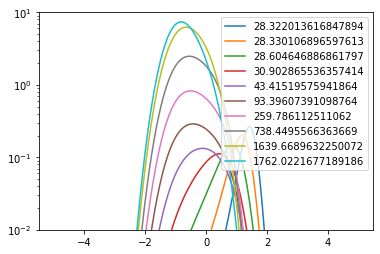

In [5]:
model.dsph.submodels["stellar_model"].update(re_pc=200)
model.dsph.submodels["DM_model"].update(rs_pc=1e4,rhos_Msunpc3=1e-2,a=3,b=8,g=0.5)
model.dsph.update(anib=0)
_R_pc = np.logspace(1,4,10)
model.dsph.sigmalos_dequad(R_pc=_R_pc,show_fig=True,ignore_nan=True)
plt.ylim([1e-2,1e1])
plt.yscale("log")



In [6]:
model.param_names
#modki17.DEBUG = True
model.is_parameters_in_domain(dict(
    re_pc=300,odds=2.0,dra0=0.0,dde0=0.0,
    log10_rs_pc=4,log10_rhos_Msunpc3=0,
    a=2.0,b=5.0,g=0.5,
    mlog10_1manib=0.0,
    vmem=-250,vfg0=0,vfg1=0,
    dvfg0=100,dvfg1=100,
    sfg0=0.501,dist=80e3))
#model.n_components

True

In [109]:
sampler = Sampler("photo",dsphdata,dsphprop,"exp2d",["re_pc","odds","dra0","dde0"],[100,1,-1e-2,-1e-2],[200,5,1e-2,1e-2])

In [110]:
sampler.run_mcmc_epoch("test.csv",n_burnin=200,n_run=100,n_epoch=5)

4 th Sampling: 100%|██████████| 100/100 [00:02<00:00, 37.43it/s]


In [111]:
sampler.wbic_run_mcmc_epoch("test_wbic.csv",n_burnin=200,n_run=100,n_epoch=5)

4 th WBIC Sampling: 100%|██████████| 100/100 [00:02<00:00, 36.43it/s]


,re_pc,odds,dra0,dde0,lnpost
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,157.297901,1.739157,-0.020760,0.007004,-244271.643379
std,4.763526,0.077195,0.011715,0.004308,1.344590
min,142.578667,1.518663,-0.069509,-0.007117,-244278.991658
25%,153.773882,1.687077,-0.028642,0.003990,-244272.315802
50%,157.198506,1.737460,-0.021448,0.006865,-244271.328749
75%,160.708457,1.789928,-0.012970,0.009956,-244270.657678
max,171.311229,2.010488,0.022607,0.023888,-244269.707251


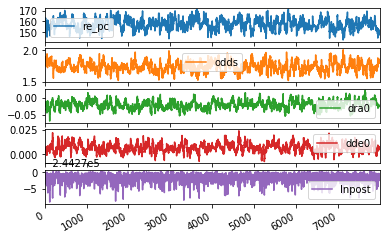

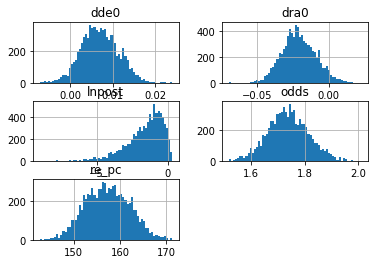

In [112]:
import pandas as pd
df = pd.read_csv("test.csv")
df.plot(subplots=True)
df.hist(bins=64)
df.describe()

,re_pc,odds,dra0,dde0,lngenpost,lnlike
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,160.383699,1.726979,-0.019192,0.007366,-25261.931885,-244288.705015
std,14.466200,0.217560,0.039897,0.013186,1.384365,13.387131
min,117.104061,1.144457,-0.142422,-0.035675,-25269.803067,-244364.821159
25%,150.543354,1.578131,-0.046305,-0.001754,-25262.636232,-244295.516209
50%,159.493708,1.720814,-0.017968,0.007023,-25261.637059,-244285.853982
75%,169.675222,1.862803,0.007504,0.016147,-25260.902209,-244278.747813
max,226.964193,2.845321,0.109708,0.055825,-25259.979112,-244269.821252


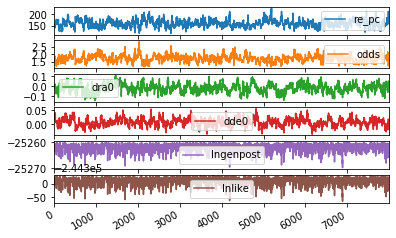

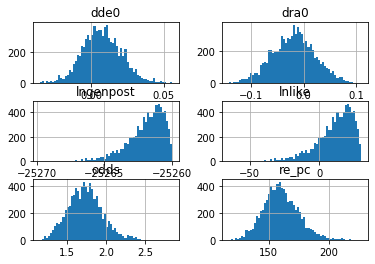

In [113]:
df_wbic = pd.read_csv("test_wbic.csv")
df_wbic.plot(subplots=True)
df_wbic.hist(bins=64)
df_wbic.describe()

In [5]:
_seed_lim = pd.read_csv("sample_paramlims.csv",index_col=0)
_width = _seed_lim.prms_max - _seed_lim.prms_min
seed_lim_lo = _seed_lim.mean(axis=1) - 1e-3*_width
seed_lim_hi = _seed_lim.mean(axis=1) + 1e-3*_width
seed_lim_lo

sampler = Sampler("spec",dsphdata,dsphprop,"Plummer",
                  _seed_lim.index,
                  seed_lim_lo.values,seed_lim_hi.values,
                  paramlims_fname="sample_paramlims.csv",
                  prior_norm_fname="sample_prior_norm.csv")

order of parameters:
 Index(['re_pc', 'odds', 'dra0', 'dde0', 'log10_rs_pc', 'log10_rhos_Msunpc3',
       'a', 'b', 'g', 'mlog10_1manib', 'vmem', 'vfg0', 'vfg1', 'dvfg0',
       'dvfg1', 'sfg0', 'dist'],
      dtype='object')
number of foreground components:  2
sc_obsdata has radial_velocity_err.                   Likelihood function is defined with velocity error:
                   [ 1.27  1.46  2.35  0.88  1.13  0.64  0.54  1.08  0.58  1.26  1.74  0.86
  0.82  0.93  0.54  0.37  1.38  1.93  0.73  0.59  0.79  0.6   0.52  0.49
  2.    1.29  1.87  1.69  0.55  0.87  1.36  2.5   2.33  1.38  0.51  0.6
  0.54  0.92  1.54  1.41  0.55  3.87  1.71  0.85  0.56  0.95  2.12  0.77
  1.56  0.52  2.2   0.96  1.96  0.5   2.18  1.14  1.22  1.41  1.    0.74
  0.58  3.81  1.35  0.59  0.51  1.78  1.37  0.51  2.73  1.    1.11  0.63
  0.5   1.42  1.96  0.7   1.14  1.6   0.64  1.23  0.5   1.23  2.01  0.5
  2.28  0.71  1.63  1.85  0.57  1.94  1.01  0.78  1.03  0.76  1.27  1.26
  0.78  1.08  0.49  0.65  1.44 

In [8]:
sampler.run_mcmc_epoch('test_spec.csv',nwalkers=64,n_burnin=1000,n_run=1000,n_epoch=5)

Burn in:   0%|          | 0/1000 [00:00<?, ?it/s]/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))
4 th Sampling: 100%|██████████| 1000/1000 [02:02<00:00,  8.53it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfa143d860>,
      dtype=object)

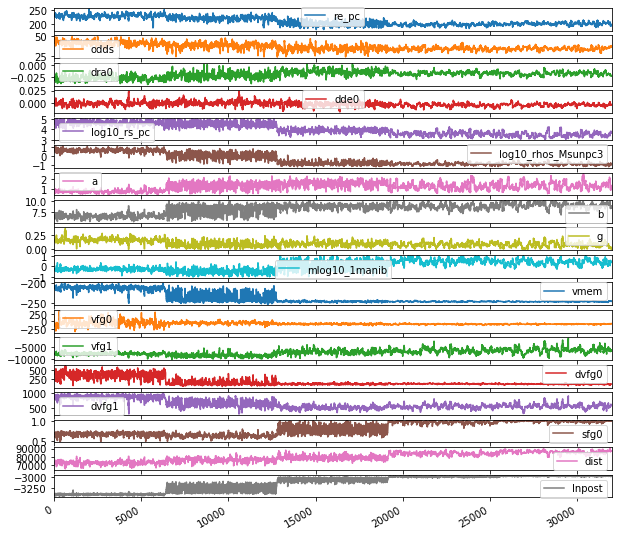

In [7]:
import pandas as pd
df_spec = pd.read_csv("test_spec.csv")
df_spec.plot(subplots=True,figsize=(10,10))
plt.show()

In [22]:
%load_ext autoreload
%autoreload 2
from memfg.jfactor import Jfactor,Jfactor_v02
chain = pd.read_csv("test_spec.csv")[-100:-1:10]
for arg in ["rhos_Msunpc3","rs_pc"]:
    chain[arg] = chain["log10_"+arg]
chain_arglogj = chain[["rhos_Msunpc3","rs_pc","a","b","g","dist"]]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
%%timeit
np.log10(Jfactor_v02(*chain_arglogj.T.values))

5.37 ms ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit
np.log10(Jfactor(*chain_arglogj.T.values,return_relerr=False,width=5e-1,pN=10,mN=10))

287 µs ± 4.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [37]:
%%timeit
np.log10(Jfactor(*chain_arglogj.T.values,return_relerr=False,width=5e-2,pN=100,mN=100))

511 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
%%timeit
np.log10(Jfactor(*chain_arglogj.T.values,return_relerr=False,width=5e-3,pN=500,mN=500))

1.5 ms ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
ret_quad = np.log10(Jfactor_v02(*chain_arglogj.T.values))
ret_dequad = np.log10(Jfactor(*chain_arglogj.T.values,return_relerr=False,width=5e-1,pN=10,mN=10))
(ret_quad-ret_dequad)/ret_quad

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

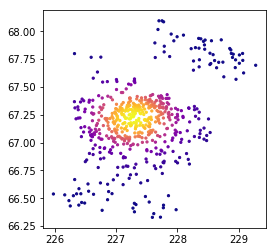

In [6]:
import matplotlib.pyplot as plt
memfg_ratio_at_R = model.memfg_ratio_at_R(model.dsph.submodels["stellar_model"],2,model.separation_pc(0,0,76e3))
plt.figure(figsize=(4,4))
plt.scatter(model.sc_obsdata.ra.deg,model.sc_obsdata.dec.deg,c=memfg_ratio_at_R,cmap="plasma",s=5)
plt.show()

In [17]:
params = pd.read_csv("test_spec.csv")
params_wo_lnpost = params[params.columns[:-1]].copy()


In [25]:
idxmax_lnpost = params.lnpost.idxmax()
idxmax_lnpost

377273

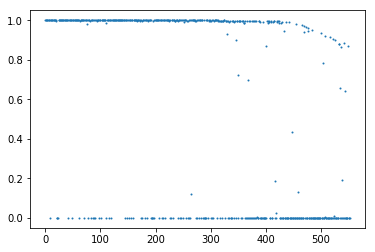

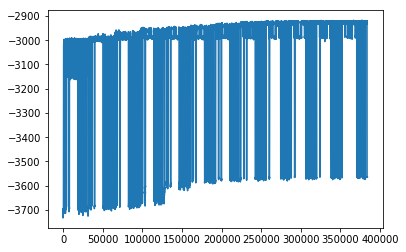

In [32]:
membership_prob = model.membership_prob(**(params_wo_lnpost.iloc[idxmax_lnpost]))
plt.plot(membership_prob,"o",markersize=1)
plt.show();plt.plot(params.lnpost)

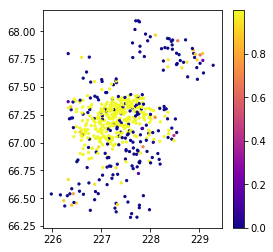

In [29]:
plt.figure(figsize=(4,4))
plt.scatter(model.sc_obsdata.ra.deg,model.sc_obsdata.dec.deg,c=membership_prob,cmap="plasma",s=5)
plt.colorbar()
plt.show()

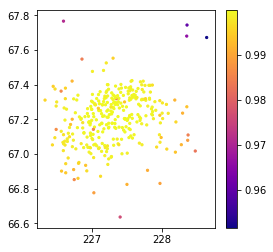

In [33]:
plt.figure(figsize=(4,4))
plt.scatter(
    model.sc_obsdata.ra.deg[membership_prob>0.95],
    model.sc_obsdata.dec.deg[membership_prob>0.95],
    c=membership_prob[membership_prob>0.95],
    cmap="plasma",s=5)
plt.colorbar()
plt.show()

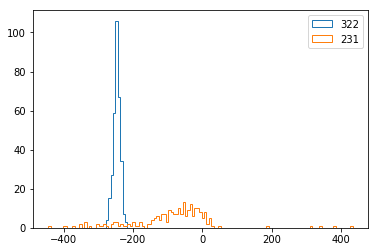

In [49]:
bins = np.linspace(
    model.sc_obsdata.radial_velocity.value.min(),
    model.sc_obsdata.radial_velocity.value.max()
    ,128)
plt.hist(model.sc_obsdata.radial_velocity.value[membership_prob>0.95],bins,histtype="step",label=(membership_prob>0.95).sum())
plt.hist(model.sc_obsdata.radial_velocity.value[membership_prob<0.95],bins,histtype="step",label=(membership_prob<0.95).sum())
#plt.hist(model.sc_obsdata.radial_velocity.value,bins,histtype="step",label=len(membership_prob))
plt.legend()

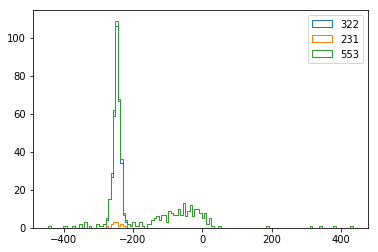

In [50]:
bins = np.linspace(
    model.sc_obsdata.radial_velocity.value.min(),
    model.sc_obsdata.radial_velocity.value.max()
    ,128)
plt.hist(model.sc_obsdata.radial_velocity.value[membership_prob>0.95],bins,histtype="step",label=(membership_prob>0.95).sum())
plt.hist(model.sc_obsdata.radial_velocity.value[membership_prob<0.95],bins,histtype="step",label=(membership_prob<0.95).sum())
plt.hist(model.sc_obsdata.radial_velocity.value,bins,histtype="step",label=len(membership_prob))
plt.legend()